In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
PATH_TO_DATASET=f"menstural_cycle_length_dataset.csv"

In [3]:
dataset_df=pd.read_csv(PATH_TO_DATASET)
dataset_df

,new_id,age,cycle_number,cycle_start_date,cycle_end_date,cycle_length,conception_cycle
0,1,26,1,05/21/2025,06/16/2025,27,No
1,1,26,2,06/17/2025,07/15/2025,29,No
2,1,26,3,07/16/2025,08/13/2025,29,Yes
3,2,28,2,06/09/2025,07/05/2025,27,No
4,2,28,3,07/06/2025,08/09/2025,26,Yes
...,...,...,...,...,...,...,...
3319,580,32,3,05/19/2025,06/14/2025,27,No
3320,580,32,4,06/15/2025,07/14/2025,30,No
3321,580,32,5,07/15/2025,08/11/2025,28,No
3322,580,32,6,08/12/2025,09/10/2025,30,No


In [4]:
dataset_df = dataset_df[dataset_df["conception_cycle"] != "missing"]

In [5]:
dataset_df

,new_id,age,cycle_number,cycle_start_date,cycle_end_date,cycle_length,conception_cycle
0,1,26,1,05/21/2025,06/16/2025,27,No
1,1,26,2,06/17/2025,07/15/2025,29,No
2,1,26,3,07/16/2025,08/13/2025,29,Yes
3,2,28,2,06/09/2025,07/05/2025,27,No
4,2,28,3,07/06/2025,08/09/2025,26,Yes
...,...,...,...,...,...,...,...
3319,580,32,3,05/19/2025,06/14/2025,27,No
3320,580,32,4,06/15/2025,07/14/2025,30,No
3321,580,32,5,07/15/2025,08/11/2025,28,No
3322,580,32,6,08/12/2025,09/10/2025,30,No


In [6]:
dataset_df["conception_cycle"]=dataset_df["conception_cycle"].apply(lambda x: 1 if x=="Yes" else 0)


In [7]:
# dataset_df["cycle_start_date"]=pd.to_datetime(dataset_df["cycle_start_date"])
# dataset_df["cycle_end_date"]=pd.to_datetime(dataset_df["cycle_end_date"])
# dataset_df['cycle_length_days'] = (dataset_df['cycle_end_date'] - dataset_df['cycle_start_date']).dt.days.abs()
dataset_df.drop(columns=["cycle_start_date","cycle_end_date"],inplace=True)

In [8]:
dataset_df

,new_id,age,cycle_number,cycle_length,conception_cycle
0,1,26,1,27,0
1,1,26,2,29,0
2,1,26,3,29,1
3,2,28,2,27,0
4,2,28,3,26,1
...,...,...,...,...,...
3319,580,32,3,27,0
3320,580,32,4,30,0
3321,580,32,5,28,0
3322,580,32,6,30,0


In [9]:
unique_ids = dataset_df["new_id"].unique()

train_ids, test_ids = train_test_split(unique_ids, test_size=0.2, random_state=42)

train_df = dataset_df[dataset_df["new_id"].isin(train_ids)]

# Create the testing set with rows where new_id is in test_ids
test_df = dataset_df[dataset_df["new_id"].isin(test_ids)]

print(f"Training set shape: {train_df.shape}")
print(f"Testing set shape: {test_df.shape}")

Training set shape: (2613, 5)
Testing set shape: (711, 5)


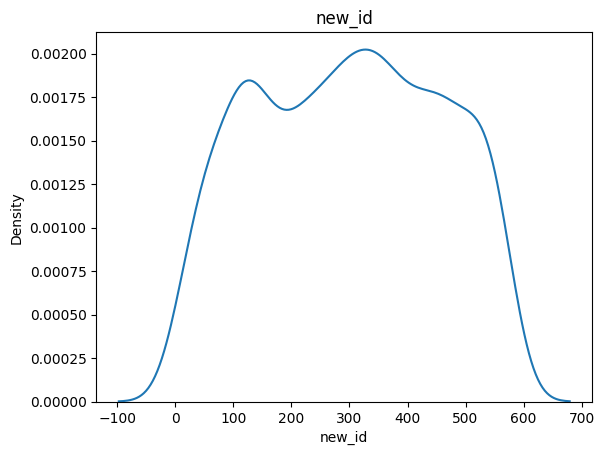

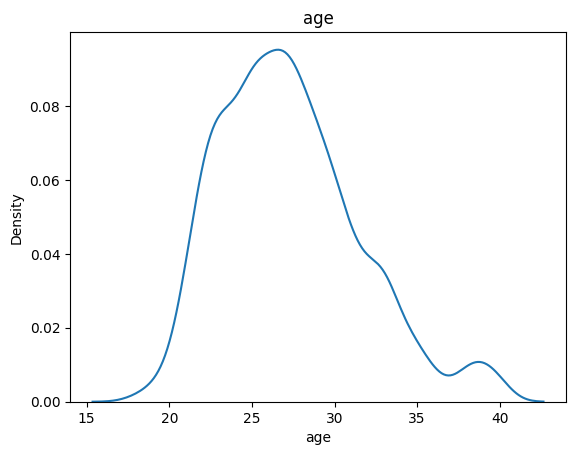

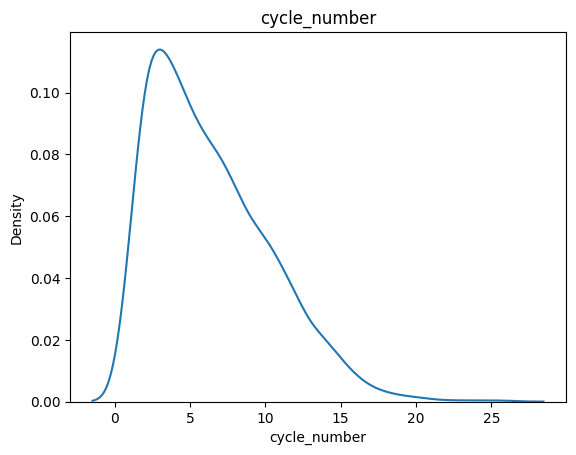

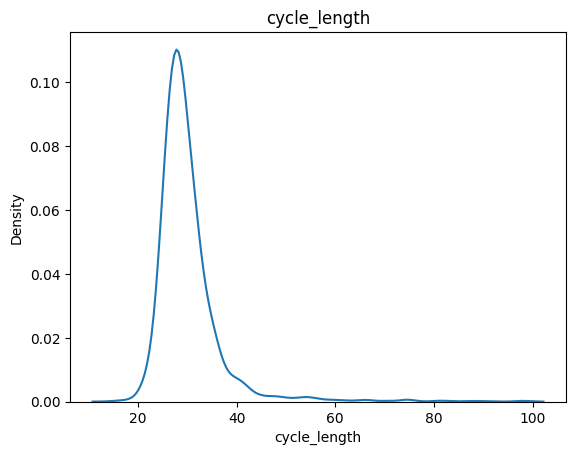

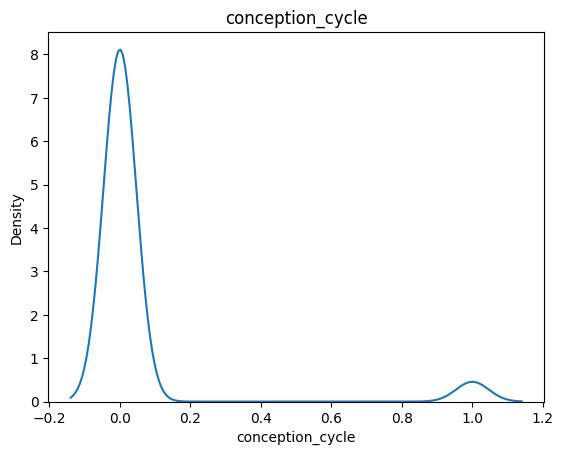

In [10]:
for i in train_df.columns:
   
        sns.kdeplot(train_df[i])
        plt.title(i)
        plt.show()

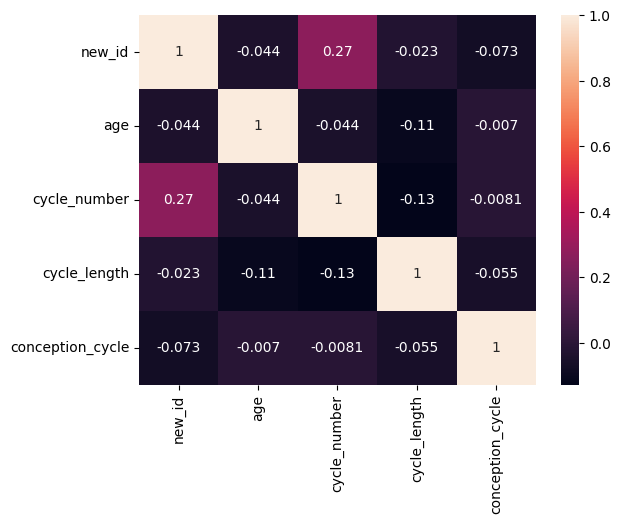

In [11]:
sns.heatmap(train_df.corr(), annot=True)
plt.show()

In [12]:
train_df.drop(columns=["new_id"],inplace=True)

C:\Users\medha\AppData\Local\Temp\ipykernel_20024\1790194219.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop(columns=["new_id"],inplace=True)


In [13]:
train_df

,age,cycle_number,cycle_length,conception_cycle
0,26,1,27,0
1,26,2,29,0
2,26,3,29,1
3,28,2,27,0
4,28,3,26,1
...,...,...,...,...
3319,32,3,27,0
3320,32,4,30,0
3321,32,5,28,0
3322,32,6,30,0


In [14]:
test_df.drop(columns=["new_id"],inplace=True)


C:\Users\medha\AppData\Local\Temp\ipykernel_20024\779700655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.drop(columns=["new_id"],inplace=True)


In [15]:
X_test = test_df.drop(columns=["cycle_length"]) 
y_test = test_df["cycle_length"]

In [16]:
X_test

,age,cycle_number,conception_cycle
5,28,1,0
6,28,2,0
7,28,3,0
8,28,4,1
24,31,1,0
...,...,...,...
3310,27,5,0
3311,27,6,0
3312,27,7,0
3313,27,8,0


In [17]:
X_train=train_df.drop(columns=["cycle_length"])
y_train=train_df["cycle_length"]

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error


rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
#train mse
y_pred = rf.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
print(f"Train MSE: {mse}")

Train MSE: 49.97627248373517


In [19]:
y_pred=rf.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print(f"Test MSE: {mse}")
print(f"Test RMSE: {np.sqrt(mse)}")

Test MSE: 49.32067510548523
Test RMSE: 7.022868011395717


In [20]:
#xgbost
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42, objective="reg:squarederror")
xgb.fit(X_train, y_train)
#train mse
y_pred = xgb.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
print(f"Train MSE: {mse}")
#rmse
print(f"Train RMSE: {np.sqrt(mse)}")

Train MSE: 39.88329993866127
Train RMSE: 6.315322631399069


In [21]:
#test
y_pred = xgb.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse}")
print(f"Test RMSE: {np.sqrt(mse)}")


Test MSE: 41.66155546550654
Test RMSE: 6.454576319597324


In [22]:
y_pred 

array([30.30189 , 30.199657, 30.098843, 27.656631, 29.195677, 30.10415 ,
       31.272879, 22.2825  , 29.503607, 24.698063, 29.572035, 32.94979 ,
       30.199657, 30.098843, 31.061216, 30.48269 , 29.088673, 30.30189 ,
       30.199657, 30.098843, 27.656631, 31.684587, 28.90171 , 31.315868,
       29.186653, 29.254562, 30.029411, 28.989279, 27.771145, 26.597725,
       26.742426, 27.138956, 30.199657, 30.098843, 31.061216, 29.088673,
       29.191841, 31.345743, 33.771557, 33.681034, 34.1059  , 30.030695,
       30.498943, 30.708057, 32.140488, 28.220455, 23.573284, 32.025047,
       24.488691, 30.70412 , 32.59673 , 31.699795, 33.126854, 33.741413,
       33.508274, 29.14649 , 30.922312, 30.468504, 29.84218 , 31.984428,
       31.639833, 30.170984, 30.84178 , 30.521906, 30.145882, 27.300888,
       30.70412 , 32.59673 , 33.771557, 33.681034, 29.333366, 31.684587,
       28.90171 , 31.315868, 29.186653, 29.33958 , 33.073376, 26.1617  ,
       32.392147, 30.168287, 30.205803, 31.202114, 

In [23]:
np.array(y_test)

array([25, 26, 27, 23, 27, 28, 25, 21, 36, 28, 26, 22, 43, 38, 43, 57, 74,
       27, 28, 26, 32, 31, 30, 31, 28, 33, 33, 29, 29, 30, 28, 28, 27, 28,
       26, 27, 29, 28, 27, 29, 28, 27, 26, 34, 28, 27, 30, 48, 34, 29, 30,
       28, 30, 28, 30, 19, 39, 30, 33, 31, 34, 32, 31, 33, 41, 38, 30, 35,
       67, 40, 32, 36, 31, 28, 32, 28, 35, 30, 29, 25, 27, 27, 24, 27, 24,
       26, 29, 24, 28, 26, 25, 25, 28, 28, 26, 77, 46, 35, 51, 35, 28, 27,
       28, 27, 31, 25, 28, 30, 21, 47, 41, 40, 31, 30, 28, 29, 34, 37, 30,
       27, 29, 28, 28, 31, 26, 27, 24, 27, 25, 24, 28, 27, 30, 30, 28, 30,
       35, 36, 36, 33, 31, 31, 29, 31, 32, 33, 35, 33, 33, 28, 26, 29, 30,
       28, 32, 32, 31, 56, 24, 28, 27, 26, 28, 24, 27, 27, 32, 26, 24, 27,
       28, 36, 36, 38, 24, 33, 31, 35, 36, 33, 29, 25, 27, 30, 27, 24, 28,
       26, 24, 27, 27, 27, 25, 27, 28, 24, 23, 27, 31, 28, 28, 28, 47, 45,
       37, 29, 35, 40, 29, 36, 30, 29, 25, 25, 25, 24, 24, 27, 26, 24, 26,
       25, 26, 26, 29, 28

In [24]:
age=20
cycle_number=40
conception_cycle=0
# cycle_length=28
#create df
data = {'age': [age], 'cycle_number': [cycle_number], 'conception_cycle': [conception_cycle]}
data=pd.DataFrame(data)
data

,age,cycle_number,conception_cycle
0,20,40,0


In [25]:
xgb.predict(data)

array([25.627613], dtype=float32)

In [26]:
#save xgb model on disk
import pickle

with open("xgb_model.pkl", "wb") as f:
    pickle.dump(xgb, f)

    

In [27]:
#load back
with open("xgb_model.pkl", "rb") as f:
    xgb_loaded = pickle.load(f)

xgb_loaded.predict(data)


array([25.627613], dtype=float32)